In [1]:
!pip install pandas numpy requests matplotlib seaborn scipy


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os
import io
import zipfile
import requests
import pandas as pd
import numpy as np
from glob import glob


# Загрузка датасета

In [3]:
DATA_DIR = "bsnlp_sample"
os.makedirs(DATA_DIR, exist_ok=True)

SAMPLE_URL = "https://bsnlp.cs.helsinki.fi/bsnlp-2019/sample_pl_cs_ru_bg.zip"

def download_and_extract_sample(url=SAMPLE_URL, outdir=DATA_DIR):
    zip_path = os.path.join(outdir, "sample.zip")
    if not os.path.exists(zip_path):
        print("Downloading sample data...")
        r = requests.get(url, stream=True)
        r.raise_for_status()
        with open(zip_path, "wb") as f:
            for chunk in r.iter_content(1024 * 1024):
                f.write(chunk)
    print("Extracting...")
    with zipfile.ZipFile(zip_path, "r") as z:
        z.extractall(outdir)
    print("Done")

try:
    download_and_extract_sample()
except Exception as e:
    print("Error downloading data:", e)


Extracting...
Done


In [4]:
def load_ru_documents(sample_dir=DATA_DIR):
    ru_docs = []
    pattern = os.path.join(sample_dir, "**", "ru", "*")
    files = glob(pattern, recursive=True)
    
    for fp in sorted(files):
        if not fp.lower().endswith(".txt"):
            continue
        try:
            text = open(fp, "r", encoding="utf-8").read()
        except:
            continue

        doc_id = os.path.splitext(os.path.basename(fp))[0]
        ru_docs.append({
            "document_id": doc_id,
            "document_text": text,
            "path": fp
        })
    return pd.DataFrame(ru_docs)

df_texts = load_ru_documents()
df_texts

,document_id,document_text,path
0,brexit_ru.txt_file_10,ru-10\nru\n2018-09-20\nhttps://rg.ru/2018/09/2...,bsnlp_sample\sample_pl_cs_ru_bg\raw\ru\brexit_...
1,brexit_ru.txt_file_1000,ru-1000\nru\n2018-07-09\nhttp://news.meta.ua/u...,bsnlp_sample\sample_pl_cs_ru_bg\raw\ru\brexit_...
2,brexit_ru.txt_file_1001,ru-1001\nru\n2018-07-09\nhttps://rg.ru/2018/07...,bsnlp_sample\sample_pl_cs_ru_bg\raw\ru\brexit_...
3,brexit_ru.txt_file_1002,ru-1002\nru\n2018-07-09\nhttps://echo.msk.ru/n...,bsnlp_sample\sample_pl_cs_ru_bg\raw\ru\brexit_...
4,brexit_ru.txt_file_1003,ru-1003\nru\n2018-07-09\nhttps://echo.msk.ru/n...,bsnlp_sample\sample_pl_cs_ru_bg\raw\ru\brexit_...
5,brexit_ru.txt_file_1004,ru-1004\nru\n2018-07-09\nhttp://www.aif.ru/pol...,bsnlp_sample\sample_pl_cs_ru_bg\raw\ru\brexit_...
6,brexit_ru.txt_file_1006,ru-1006\nru\n2018-07-09\nhttp://polit.ru/news/...,bsnlp_sample\sample_pl_cs_ru_bg\raw\ru\brexit_...
7,brexit_ru.txt_file_1011,ru-1011\nru\n2018-07-09\nhttps://tsargrad.tv/n...,bsnlp_sample\sample_pl_cs_ru_bg\raw\ru\brexit_...
8,brexit_ru.txt_file_1017,ru-1017\nru\n2018-07-09\nhttp://www.unn.com.ua...,bsnlp_sample\sample_pl_cs_ru_bg\raw\ru\brexit_...


In [5]:
print(df_texts.loc[0, "document_text"])

ru-10
ru
2018-09-20
https://rg.ru/2018/09/20/tereza-mej-rasschityvaet-usidet-v-sedle-do-zaversheniia-procedury-brexit.html
Тереза Мэй рассчитывает усидеть в седле до завершения процедуры Brexit

Тем не менее, по сведениям британских СМИ, на предстоящей в конце сентября конференции партии тори противники Мэй навяжут ей серьезный бой, из которого не факт, что она выйдет победителем. Фаворит букмекеров в качестве возможного сменщика нынешнего премьера, бывший министр иностранных дел Британии Борис Джонсон намерен выступить с альтернативным докладом, который не оставит камня на камне от взглядов главы правительства на условия "брекзита". С точки зрения Джонсона, "Лондон обернул британскую конституцию поясом смертника и вручил детонатор Мишелю Барнье (главному переговорщику Брюсселя по "брекзиту". - От ред.)". С этой метафорой и предстоит сражаться на конференции главе правительства Альбиона.

Ради будущего торгового договора с единой Европой Лондон действительно согласился на множество уст

# Задание 1 — описание задачи Named Entity Recognition (NER)
## Это задача выделения именованных сущностей PER, ORG, LOC, EVT, PRO

## Классические методы:
 • Правила, словари, регулярные выражения.
 • Статистические модели: CRF
 • Нейросети: BiLSTM-CRF, CNN-BLSTM.
 • Трансформеры: BERT, RuBERT

## Решение через LLM:
 • Формируем prompt -> LLM возвращает список сущностей.(структурированный output)

## Метрики:
 • Precision / Recall / F1.



# Задание 2
## Реализуйте чтение датасета в pandas DataFrame с обязательными колонками "document_id", "document_text", "entity", "gold_answer". Выведите шапку датафрейма.

## Заполнение датафрейма реализовано ниже после получения разметки

In [6]:
df = df_texts[["document_id", "document_text"]].copy()
df["entity"] = None       
df["gold_answer"] = None   
df

,document_id,document_text,entity,gold_answer
0,brexit_ru.txt_file_10,ru-10\nru\n2018-09-20\nhttps://rg.ru/2018/09/2...,None,None
1,brexit_ru.txt_file_1000,ru-1000\nru\n2018-07-09\nhttp://news.meta.ua/u...,None,None
2,brexit_ru.txt_file_1001,ru-1001\nru\n2018-07-09\nhttps://rg.ru/2018/07...,None,None
3,brexit_ru.txt_file_1002,ru-1002\nru\n2018-07-09\nhttps://echo.msk.ru/n...,None,None
4,brexit_ru.txt_file_1003,ru-1003\nru\n2018-07-09\nhttps://echo.msk.ru/n...,None,None
5,brexit_ru.txt_file_1004,ru-1004\nru\n2018-07-09\nhttp://www.aif.ru/pol...,None,None
6,brexit_ru.txt_file_1006,ru-1006\nru\n2018-07-09\nhttp://polit.ru/news/...,None,None
7,brexit_ru.txt_file_1011,ru-1011\nru\n2018-07-09\nhttps://tsargrad.tv/n...,None,None
8,brexit_ru.txt_file_1017,ru-1017\nru\n2018-07-09\nhttp://www.unn.com.ua...,None,None


In [7]:
import re

def clean_text(text):
    if not isinstance(text, str):
        return text  # или return "" если нужно заменить NaN/не-строки на пустую строку
    
    # 1. Удаляем все переносы строк и заменяем на один пробел
    text = re.sub(r'\s*\n\s*', ' ', text)
    
    # 2. Удаляем URL (все, что похоже на http:// или https://)
    text = re.sub(r'https?://\S+', '', text)
    # 4. Убираем лишние пробелы
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Датафрейм промежуточный со словарями полученной разметки - эталонной разметки

In [8]:
df_merge = df.copy()
df_merge = df_merge.rename(columns={"entity": "entities"})

df_merge['document_text'] = df_merge['document_text'].apply(clean_text)


In [9]:
df_merge['document_text'].iloc[1]

'ru-1000 ru 2018-07-09 Подробности.ua: Третий за сутки: Борис Джонсон покинул пост министра иностранных дел Великобритании Таким образом, Джонсон стал третьим министром, который покинул свой пост в течении суток. Раннее о своем уходе объявили министр по вопросам выхода Великобритании из ЕС Дэвид Дэвис и заместитель министра по Brexit Стив Бейкер. Напомним, ранее премьер-министр Великобритании Тереза Мэй пообещала отправить в отставку главу МИД Соединенного Королевства Бориса Джонсона, если он попытается ослабить согласованную ее кабинетом коллективную позицию относительно будущих переговоров с ЕС. Об этом сообщает The Guardian, передает УНН. "Сегодня днем премьер-министр принял отставку Бориса Джонсона с поста качестве министра иностранных дел. Его замена будет объявлена в ближайшее время. Премьер-министр благодарит Бориса за его работу", - сообщил пресс-секретарь британского парламента.'

## Загружаем annotated в gold_answer

In [10]:
from pathlib import Path
def fill_gold_answer(df: pd.DataFrame) -> pd.DataFrame:
    """
    Заполняет gold_answer из:
        bsnlp_sample/sample_pl_cs_ru_bg/annotated/ru/{document_id}.out
    """
    df = df.copy()
    if "gold_answer" not in df.columns:
        df["gold_answer"] = None

    annotated_ru = Path(DATA_DIR) / "sample_pl_cs_ru_bg" / "annotated" / "ru"
    doc_id_to_idx = {doc_id: idx for idx, doc_id in enumerate(df["document_id"])}

    for out_path in annotated_ru.glob("*.out"):
        doc_id = out_path.stem
        if doc_id not in doc_id_to_idx:
            continue
         # 2. Схлопываем множественные <TAB> подряд → один <TAB>
                line = re.sub(r'<TAB>+', '<TAB>', line)

        try:
            lines = out_path.read_text(encoding="utf-8").splitlines()
            ann_lines = lines[1:] if len(lines) > 1 else []  # пропускаем 1-ю строку (ru-1000 и т.п.)

            gold_dict = {
                str(i): line.replace("\t", "<TAB>")
                for i, line in enumerate(ann_lines, start=1)
                if line.strip()
            }

            idx = doc_id_to_idx[doc_id]
            df.at[idx, "gold_answer"] = gold_dict

        except Exception as e:
            print(f"⚠️ Ошибка обработки {out_path}: {e}")
            df.at[idx, "gold_answer"] = {}

    return df

In [17]:
import re

def fix_gold_answer_double_tab(gold_dict):
    """
    Исправляет gold_answer словарь:
    - заменяет '<TAB><TAB>' на '<TAB>{surface}<TAB>', если каноническое поле пустое,
    - гарантирует ровно 4 поля,
    - не ломает корректные строки.

    Пример:
        "Brexit<TAB><TAB>EVT<TAB>EVT-Brexit"
        → "Brexit<TAB>Brexit<TAB>EVT<TAB>EVT-Brexit"

    Вход: dict вида {"1": "...<TAB>...", ...}
    Возвращает: новый dict с исправленными значениями
    """
    fixed = {}
    for key, line in gold_dict.items():
        if not isinstance(line, str):
            fixed[key] = line
            continue

        # Заменяем множественные <TAB> на одиночные, но с сохранением позиций
        # Нормализуем: <TAB><TAB> → ['surface', '', 'type', 'id']
        parts = [p.strip() for p in re.split(r'<TAB>', line)]
        
        # Если < 4 — дополняем пустыми
        while len(parts) < 4:
            parts.append("")
        # Если > 4 — обрезаем (редко, но бывает)
        parts = parts[:4]
        
        surface, canonical, typ, norm_id = parts

        # Если canonical пустой — заменяем на surface
        if not canonical:
            canonical = surface

        fixed[key] = "<TAB>".join([surface, canonical, typ, norm_id])
    
    return fixed

In [11]:
# from pathlib import Path
# import re

# def fill_gold_answer(df: pd.DataFrame) -> pd.DataFrame:
#     """
#     Заполняет gold_answer из:
#         bsnlp_sample/sample_pl_cs_ru_bg/annotated/ru/{document_id}.out
    
#     Исправляет множественные <TAB> подряд → ровно 3 <TAB> (4 поля).
#     """

#     df = df.copy()
#     if "gold_answer" not in df.columns:
#         df["gold_answer"] = None

#     annotated_ru = Path(DATA_DIR) / "sample_pl_cs_ru_bg" / "annotated" / "ru"
#     doc_id_to_idx = {doc_id: idx for idx, doc_id in enumerate(df["document_id"])}

#     for out_path in annotated_ru.glob("*.out"):
#         doc_id = out_path.stem
#         if doc_id not in doc_id_to_idx:
#             continue

#         try:
#             lines = out_path.read_text(encoding="utf-8").splitlines()
#             ann_lines = lines[1:] if len(lines) > 1 else []  # пропускаем 1-ю строку (ru-1000 и т.п.)

#             gold_dict = {}
#             for i, line in enumerate(ann_lines, start=1):
#                 if not line.strip():
#                     continue

#                 # 1. Замена \t → <TAB>
#                 line = line.replace("\t", "<TAB>")

#                 # 2. Схлопываем множественные <TAB> подряд → один <TAB>
#                 line = re.sub(r'<TAB>+', '<TAB>', line)

#                 # 3. Разбиваем и оставляем ровно 4 поля (добавляем пустые при необходимости)
#                 parts = [p.strip() for p in line.split("<TAB>")]
#                 while len(parts) < 4:
#                     parts.append("")
#                 parts = parts[:4]  # обрезаем, если >4

#                 # 4. Восстанавливаем
#                 normalized_line = "<TAB>".join(parts)
#                 gold_dict[str(i)] = normalized_line

#             idx = doc_id_to_idx[doc_id]
#             df.at[idx, "gold_answer"] = gold_dict

#         except Exception as e:
#             print(f"⚠️ Ошибка обработки {out_path}: {e}")
#             df.at[idx, "gold_answer"] = {}

#     return df

In [21]:
df_merge = fill_gold_answer(df_merge)
# Исправляем только 5-ю строку (brexit_ru.txt_file_1004)
idx = 5
df_merge.at[idx, "gold_answer"] = fix_gold_answer_double_tab(df_merge.iloc[idx]["gold_answer"])
print(f"Загружено документов: {len(df_merge)}")
print("Пример gold_answer:")
sample = df_merge.iloc[5]["gold_answer"]
if sample:
    for k, v in list(sample.items())[:3]:
        print(f'  "{k}": "{v}"')

Загружено документов: 9
Пример gold_answer:
  "1": "Brexit<TAB>Brexit<TAB>EVT<TAB>EVT-Brexit"
  "2": "Борис Джонсон<TAB>Борис Джонсон<TAB>PER<TAB>PER-Boris-Johnson"
  "3": "Германии<TAB>Германии<TAB>LOC<TAB>GPE-Germany"


In [22]:
df_merge['gold_answer'].iloc[1]

{'1': 'Brexit<TAB>Brexit<TAB>EVT<TAB>EVT-Brexit',
 '2': 'The Guardian<TAB>The Guardian<TAB>PRO<TAB>PRO-The-Guardian',
 '3': 'Борис Джонсон<TAB>Борис Джонсон<TAB>PER<TAB>PER-Boris-Johnson',
 '4': 'Бориса Джонсона<TAB>Борис Джонсон<TAB>PER<TAB>PER-Boris-Johnson',
 '5': 'Бориса<TAB>Бориса<TAB>PER<TAB>PER-Boris-Johnson',
 '6': 'Великобритании<TAB>Великобритания<TAB>LOC<TAB>GPE-Great-Britain',
 '7': 'Джонсон<TAB>Джонсон<TAB>PER<TAB>PER-Boris-Johnson',
 '8': 'Дэвид Дэвис<TAB>Дэвид Дэвис<TAB>PER<TAB>PER-David-Davis',
 '9': 'ЕС<TAB>ЕС<TAB>ORG<TAB>ORG-European-Union',
 '10': 'МИД Соединенного Королевства<TAB>МИД Соединенного Королевства<TAB>ORG<TAB>ORG-Foreign-Office',
 '11': 'Подробности.ua<TAB>Подробности.ua<TAB>PRO<TAB>PRO-Podrobnosti',
 '12': 'Стив Бейкер<TAB>Стив Бейкер<TAB>PER<TAB>PER-Steve-Baker',
 '13': 'Тереза Мэй<TAB>Тереза Мэй<TAB>PER<TAB>PER-Theresa-May',
 '14': 'УНН<TAB>УНН<TAB>ORG<TAB>ORG-UNN'}

In [23]:
DATA_DIR = "bsnlp_sample"

annotated_ru = Path(DATA_DIR) / "sample_pl_cs_ru_bg" / "annotated" / "ru"
out_files = list(annotated_ru.glob("*.out"))
print(f"📁 Найдено .out файлов: {len(out_files)}")
if out_files:
    print("Пример:", out_files[0])

📁 Найдено .out файлов: 9
Пример: bsnlp_sample\sample_pl_cs_ru_bg\annotated\ru\brexit_ru.txt_file_10.out


In [24]:
df_merge

,document_id,document_text,entities,gold_answer
0,brexit_ru.txt_file_10,ru-10 ru 2018-09-20 Тереза Мэй рассчитывает ус...,None,{'1': 'Brexit<TAB>Brexit<TAB>EVT<TAB>EVT-Brexi...
1,brexit_ru.txt_file_1000,ru-1000 ru 2018-07-09 Подробности.ua: Третий з...,None,{'1': 'Brexit<TAB>Brexit<TAB>EVT<TAB>EVT-Brexi...
2,brexit_ru.txt_file_1001,ru-1001 ru 2018-07-09 Глава МИД Британии Борис...,None,{'1': 'Associated Press<TAB><TAB>ORG<TAB>ORG-T...
3,brexit_ru.txt_file_1002,ru-1002 ru 2018-07-09 09.07.2018 18:09 : Премь...,None,{'1': 'Бориса Джонсона<TAB>Борис Джонсон<TAB>P...
4,brexit_ru.txt_file_1003,ru-1003 ru 2018-07-09 09.07.2018 17:02 : Минис...,None,{'1': 'Борис Джонсон<TAB>Борис Джонсон<TAB>PER...
5,brexit_ru.txt_file_1004,ru-1004 ru 2018-07-09 Борис Джонсон ушел в отс...,None,{'1': 'Brexit<TAB>Brexit<TAB>EVT<TAB>EVT-Brexi...
6,brexit_ru.txt_file_1006,ru-1006 ru 2018-07-09 Захарова лирически проко...,None,{'1': 'Brexit<TAB>Brexit<TAB>EVT<TAB>EVT-Brexi...
7,brexit_ru.txt_file_1011,ru-1011 ru 2018-07-09 За Борисом Джонсоном пос...,None,{'1': 'Brexit<TAB>Brexit<TAB>EVT<TAB>EVT-Brexi...
8,brexit_ru.txt_file_1017,ru-1017 ru 2018-07-09 Борис Джонсон подал в от...,None,{'1': 'Brexit<TAB>Brexit<TAB>EVT<TAB>EVT-Brexi...


# Задание 3
## Создание функции для написания промта



In [25]:
# def make_gigachat_prompt(doc_text: str) -> str:
#     return f"""Ты — эксперт по извлечению именованных сущностей.  
# Твоя задача: извлечь из следующего русского новостного текста ВСЕ уникальные именованные сущности строго пяти типов:
# — PER (персоны и группы людей, связанные с геополитическими сущностями),
# — ORG (организации: партии, компании, институты, международные объединения),
# — LOC (локации: страны, города, регионы, здания, аэропорты),
# — EVT (события: конференции, катастрофы, политические процессы, включая “брекзит”),
# — PRO (продукты: соцсети, программы, инициативы, ПО, СМИ).

# ВАЖНЫЕ ПРАВИЛА (СЛЕДУЙ СТРОГО):
# 1. Не возвращай более одного упоминания на одну форму слова в документе (даже если встречается много раз — один раз).
# 2. Приводи каждое упоминание к базовой форме (лемме):
#    - “Брюсселя”, “Брюсселю” → “Брюссель”,
#    - “британских”, “британцев” → “британцы”,
#    - “брекзита” → “brexit”.
# 3. Используй один и тот же cross-lingual ID для связанных сущностей:
#    - “Британии”, “британцы”, “Альбион” → один ID (например: `GPE-Great-Britain`),
#    - “ЕС”, “Евросоюз”, “Европейского союза” → один ID (например: `ORG-European-Union`).
# 4. Типы сущностей:
#    - PER: люди, национальности/регионы как группы (e.g., *британцы*, *украинцы*), даже если слово прилагательное.
#    - ORG > PRO при неоднозначности (например, *Twitter* в “Twitter объявил прибыль” → ORG; в “я написал в Twitter” → PRO).
#    - LOC для всех геообъектов и сооружений (e.g., *аэропорт Шипол* → LOC).
#    - EVT: включает гипотетические события (*brexit*, *czexit*).
#    - PRO: веб-сервисы, ПО, СМИ, инициативы (e.g., *Twitter*, *Horizon 2020*).
# 5. Не извлекай: даты, суммы (e.g., *39 миллиардов*), местоимения (*он*, *она*), общие слова без имени (*парламент* без уточнения), email/URL.

# ПРИМЕРЫ:
# — PER:  
#   “британцев” → `британцы<TAB>PER<TAB>GPE-Great-Britain`  
#   “Мишель Барнье” → `Мишель Барнье<TAB>PER<TAB>PER-Michel-Barnier`
# — ORG:  
#   “Европейского парламента” → `Европейский парламент<TAB>ORG<TAB>ORG-European-Parliament`
# — LOC:  
#   “Брюсселя” → `Брюссель<TAB>LOC<TAB>GPE-Brussels`  
#   “Северную Ирландию” → `Северная Ирландия<TAB>LOC<TAB>GPE-Northern-Ireland`
# — EVT:  
#   “брекзита” → `brexit<TAB>EVT<TAB>EVT-Brexit`  
#   “конференции партии тори” → `Конференция партии тори<TAB>EVT<TAB>EVT-Tory-Conference-2018`
# — PRO:  
#   “Twitter” в “написал в Twitter” → `Twitter<TAB>PRO<TAB>PRO-Twitter`

# ФОРМАТ ОТВЕТА:
# Верни ТОЛЬКО JSON-словарь, где ключи — номера (1, 2, 3, ...), значения — строки в формате:
# "mention<TAB>lemma<TAB>type<TAB>cross-lingual-ID"

# Пример корректного ответа:
# {{
#   "1": "Тереза Мэй<TAB>Тереза Мэй<TAB>PER<TAB>PER-Theresa-May",
#   "2": "Брюсселя<TAB>Брюссель<TAB>LOC<TAB>GPE-Brussels",
#   "3": "брекзита<TAB>brexit<TAB>EVT<TAB>EVT-Brexit"
# }}

# НЕ добавляй пояснений, комментариев, markdown, никакого текста вне JSON-объекта.

# Текст для обработки:
# {doc_text}
# """

In [26]:
# def make_gigachat_prompt(doc_text: str) -> str:
#     return f"""Ты — эксперт по извлечению именованных сущностей.  
# Твоя задача: извлечь из следующего русского новостного текста ВСЕ уникальные именованные сущности строго пяти типов:
# — PER (персоны и группы людей, связанные с геополитическими сущностями),
# — ORG (организации: партии, компании, институты, международные объединения),
# — LOC (локации: страны, города, регионы, здания, аэропорты),
# — EVT (события: конференции, катастрофы, политические процессы, включая "брекзит"),
# — PRO (продукты: соцсети, программы, инициативы, ПО, СМИ).

# ВАЖНЫЕ ПРАВИЛА (СЛЕДУЙ СТРОГО):
# 1. ВЕРНИ КАЖДОЕ УНИКАЛЬНОЕ УПОМИНАНИЕ из текста, даже если это разные формы одной сущности. Например, для "Борис Джонсон", "Бориса Джонсона", "Джонсон" — три отдельные записи с одним ID.
# 2. В `mention` сохраняй дословное написание из текста (со всеми падежами, сокращениями, опечатками).
# 3. В `lemma` указывай нормализованную форму:
#    - Для людей и организаций: именительный падеж ("Брюсселя" → "Брюссель")
#    - Для аббревиатур и устойчивых терминов: исходная форма ("ЕС", "brexit")
#    - Не переводи/не переименовывай ("ЕС" не → "Европейский союз")
# 4. Используй один cross-lingual ID для всех форм одной сущности:
#    - Все формы страны/народа → один GPE-ID
#    - Все формы организации → один ORG-ID
#    - Все формы события → один EVT-ID
# 5. Типы сущностей:
#    - ORG > PRO при неоднозначности (если организация действует как организация → ORG)
#    - Аббревиатуры-госучреждения (МИД, ЕК) → ORG
#    - Новостные СМИ как издания → PRO, как организации → ORG
# 6. НЕ извлекай: даты, суммы, местоимения, общие слова без уточнения.

# УНИВЕРСАЛЬНЫЕ ПРИМЕРЫ (следуй принципам):
# — Разные формы одной сущности (PER):
#   "Бориса Джонсона" → Борис Джонсон<TAB>PER<TAB>PER-Boris-Johnson
#   "Джонсон" → Джонсон<TAB>PER<TAB>PER-Boris-Johnson
#   "Себастьяна Курца" → Себастьян Курц<TAB>PER<TAB>PER-Sebastian-Kurz
# — Геополитические объекты (LOC + PER):
#   "Британии" → Великобритания<TAB>LOC<TAB>GPE-Great-Britain
#   "британцев" → британцы<TAB>PER<TAB>GPE-Great-Britain
#   "англичан" → англичане<TAB>PER<TAB>GPE-Great-Britain
# — Организации (ORG):
#   "Евросоюза" → ЕС<TAB>ORG<TAB>ORG-European-Union
#   "Европейской комиссии" → Европейская комиссия<TAB>ORG<TAB>ORG-European-Commission
#   "британского парламента" → Парламент Великобритании<TAB>ORG<TAB>ORG-British-Parliament
#   "МИД" → МИД<TAB>ORG<TAB>ORG-Foreign-Office
# — События (EVT):
#   "брекзита" → brexit<TAB>EVT<TAB>EVT-Brexit
#   "конференции Консервативной партии" → Конференция Консервативной партии<TAB>EVT<TAB>EVT-Tory-Conference
#   "саммите ЕС" → Саммит Европейского союза<TAB>EVT<TAB>EVT-EU-Summit
# — Продукты (PRO):
#   "Twitter" → Twitter<TAB>PRO<TAB>PRO-Twitter
#   "Horizon 2020" → Horizon 2020<TAB>PRO<TAB>PRO-Horizon-2020

# ФОРМАТ ОТВЕТА:
# Верни ТОЛЬКО JSON-словарь, где ключи — номера (1, 2, 3, ...), значения — строки в формате:
# "mention<TAB>lemma<TAB>type<TAB>cross-lingual-ID"

# Пример корректного ответа:
# {{
#   "1": "Бориса Джонсона<TAB>Борис Джонсон<TAB>PER<TAB>PER-Boris-Johnson",
#   "2": "Джонсон<TAB>Джонсон<TAB>PER<TAB>PER-Boris-Johnson",
#   "3": "брекзита<TAB>brexit<TAB>EVT<TAB>EVT-Brexit"
# }}

# НЕ добавляй пояснений, комментариев, markdown, никакого текста вне JSON-объекта.

# Текст для обработки:
# {doc_text}
# """

In [27]:
# import re

# def make_gigachat_prompt(doc_text: str) -> str:
#     # Минимизируем входной текст: убираем \n, лишние пробелы, префиксы (ru-1000 ru 2018-...)
#     clean_doc = re.sub(r'^[a-z]{2}-\d+\s+[a-z]{2}\s+\d{4}-\d{2}-\d{2}\s*', '', doc_text)
#     clean_doc = re.sub(r'\s+', ' ', clean_doc).strip()
    
#     return (
#         "Ты — точный извлекатель именованных сущностей. "
#         "Извлеки ТОЛЬКО те упоминания, которые ЕСТЬ в тексте дословно. НЕ интерполируй, НЕ обобщай, НЕ выдумывай. "
        
#         "Типы: "
#         "PER — люди и группы («британцы»), "
#         "ORG — организации/учреждения («ЕС», «МИД», «УНН»), "
#         "LOC — география («Великобритания», «Брюссель»), "
#         "EVT — события («brexit»), "
#         "PRO — продукты/издания («Подробности.ua», «The Guardian», «Twitter»). "
        
#         "Правила: "
#         "1. mention = дословно из текста, с опечатками и падежами. "
#         "2. lemma = норм. форма: имен. падеж для имён/организаций («Бориса Джонсона»→«Борис Джонсон»), исходная для аббревиатур («ЕС», «brexit»). "
#         "   — «Бориса» → lemma=«Бориса» (если в тексте только «Бориса», не «Борис Джонсон»). "
#         "3. ID: один на сущность. PER — PER-FirstName-LastName, ORG — ORG-Name, LOC — GPE-Name, EVT — EVT-Name, PRO — PRO-Name. "
#         "4. Приоритеты: «МИД», «ЕК» → ORG; СМИ как сайт/издание → PRO («Подробности.ua», «The Guardian»), как агентство → ORG («УНН»). "
#         "5. ЗАПРЕЩЕНО: "
#         "   — извлекать должности («министр», «премьер-министр»), "
#         "   — составные фразы без прямого упоминания («пресс-секретарь британского парламента» — нет в тексте!), "
#         "   — даты, числа, местоимения, описания. "
        
#         "Примеры (дословно по правилам): "
#         "«Бориса Джонсона» → Борис Джонсон<TAB>PER<TAB>PER-Boris-Johnson; "
#         "«Джонсон» → Джонсон<TAB>PER<TAB>PER-Boris-Johnson; "
#         "«Бориса» → Бориса<TAB>PER<TAB>PER-Boris-Johnson; "
#         "«Великобритании» → Великобритания<TAB>LOC<TAB>GPE-Great-Britain; "
#         "«ЕС» → ЕС<TAB>ORG<TAB>ORG-European-Union; "
#         "«МИД Соединенного Королевства» → МИД Соединенного Королевства<TAB>ORG<TAB>ORG-Foreign-Office; "
#         "«brexit» → brexit<TAB>EVT<TAB>EVT-Brexit; "
#         "«The Guardian» → The Guardian<TAB>PRO<TAB>PRO-Guardian; "
#         "«УНН» → УНН<TAB>ORG<TAB>ORG-UNN; "
#         "«Подробности.ua» → Подробности.ua<TAB>PRO<TAB>PRO-Podrobnosti. "
        
#         "Формат ответа: ТОЛЬКО JSON {\"1\": \"mention<TAB>lemma<TAB>type<TAB>ID\", ...}, без пояснений. "
        
#         f"Текст: {clean_doc}"
#     )

In [28]:
import re

def make_gigachat_prompt(doc_text: str) -> str:
    # Минимизируем входной текст: убираем \n, лишние пробелы, префиксы (ru-1000 ru 2018-...)
    clean_doc = re.sub(r'^[a-z]{2}-\d+\s+[a-z]{2}\s+\d{4}-\d{2}-\d{2}\s*', '', doc_text)
    clean_doc = re.sub(r'\s+', ' ', clean_doc).strip()
    
    return (
        "Ты — точный извлекатель именованных сущностей. "
        "Извлеки ВСЕ упоминания, которые ЕСТЬ в тексте дословно. НЕ интерполируй, НЕ обобщай, НЕ выдумывай. "
        
        "Особое внимание: "
        "• Любое написание 'brexit' (Brexit, brexit, BREXIT, Брекзит, брекзит) — это EVT-Brexit. "
        "• Даже внутри словосочетаний: 'по Brexit', 'после brexit'— извлекай 'Brexit' как отдельную сущность. "
        "• Извлекай имена в косвенных падежах как отдельные упоминания: «Бориса», «Бориса Джонсона», «Терезы Мэй» — это уникальные mention’ы. "
        
        "Типы: "
        "PER — люди и группы («британцы»), "
        "ORG — организации/учреждения («ЕС», «МИД», «УНН»), "
        "LOC — география («Великобритания», «Брюссель»), "
        "EVT — события (обязательно: Brexit), "
        "PRO — продукты/издания («Подробности.ua», «The Guardian»). "
        
        "Правила: "
        "1. mention = дословно из текста (сохраняй регистр и форму: «Бориса», «Brexit»). "
        "2. lemma: "
        "   — «Бориса Джонсона» → «Борис Джонсон»; "
        "   — «Бориса» → «Бориса»; "
        "   — «Brexit» / «brexit» → «Brexit» (всегда с заглавной в lemma для единообразия); "
        "3. ID: PER-Boris-Johnson, ORG-European-Union, EVT-Brexit и т.д. "
        "4. СМИ: «The Guardian», «Подробности.ua» → PRO; «УНН» → ORG. "
        "5. ЗАПРЕЩЕНО: должности, составные фразы без прямого упоминания, даты, числа. "
        
        "Примеры (обязательно следуй): "
        "«по Brexit» → Brexit<TAB>Brexit<TAB>EVT<TAB>EVT-Brexit; "
        "«Бориса Джонсона» → Борис Джонсон<TAB>PER<TAB>PER-Boris-Johnson; "
        "«Бориса» → Бориса<TAB>PER<TAB>PER-Boris-Johnson; "
        "«Великобритании» → Великобритания<TAB>LOC<TAB>GPE-Great-Britain; "
        "«ЕС» → ЕС<TAB>ORG<TAB>ORG-European-Union; "
        "«МИД Соединенного Королевства» → МИД Соединенного Королевства<TAB>ORG<TAB>ORG-Foreign-Office; "
        "«The Guardian» → The Guardian<TAB>PRO<TAB>PRO-Guardian; "
        "«УНН» → УНН<TAB>ORG<TAB>ORG-UNN; "
        "«Подробности.ua» → Подробности.ua<TAB>PRO<TAB>PRO-Podrobnosti. "
        
        "Формат ответа: ТОЛЬКО JSON {\"1\": \"mention<TAB>lemma<TAB>type<TAB>ID\", ...}, без пояснений. "
        
        f"Текст: {clean_doc}"
    )

In [29]:
# def make_gigachat_prompt(doc_text: str) -> str:
#     # Убираем префиксы и \n
#     clean_doc = re.sub(r'^[a-z]{2}-\d+\s+[a-z]{2}\s+\d{4}-\d{2}-\d{2}\s*', '', doc_text)
#     clean_doc = re.sub(r'\s+', ' ', clean_doc).strip()
    
#     return (
#         "Ты — извлекатель именованных сущностей. Извлеки ТОЛЬКО дословные упоминания из текста. "
#         "НЕ извлекай должности («премьер», «глава МИД»), описания, составные фразы. "
        
#         "❗ Обязательно извлеки: "
#         "— Любое «brexit»/«Брекзит» → EVT-Brexit (mention = как в тексте, lemma = «Brexit»); "
#         "— Имена в косвенных падежах: «Джонсона», «Бориса», «Мэй» → отдельные mention’ы; "
#         "— lemma для PER — именительный падеж: «Бориса» → «Борис», «Джонсона» → «Джонсон»; "
#         "— ЕС/Евросоюз/Брюссель → ORG-European-Union; "
#         "— УНН → ORG; СМИ (The Guardian, Echo.MSK, Подробности.ua) → PRO. "
        
#         "Формат: ТОЛЬКО JSON {\"1\": \"mention<TAB>lemma<TAB>type<TAB>ID\", ...}. "
        
#         f"Текст: {clean_doc}"
#     )

In [30]:
df_promts = df_merge[["document_id", "document_text"]].copy()

df_promts["prompt"] = df_promts["document_text"].apply(make_gigachat_prompt)

df_promts.head()


,document_id,document_text,prompt
0,brexit_ru.txt_file_10,ru-10 ru 2018-09-20 Тереза Мэй рассчитывает ус...,Ты — точный извлекатель именованных сущностей....
1,brexit_ru.txt_file_1000,ru-1000 ru 2018-07-09 Подробности.ua: Третий з...,Ты — точный извлекатель именованных сущностей....
2,brexit_ru.txt_file_1001,ru-1001 ru 2018-07-09 Глава МИД Британии Борис...,Ты — точный извлекатель именованных сущностей....
3,brexit_ru.txt_file_1002,ru-1002 ru 2018-07-09 09.07.2018 18:09 : Премь...,Ты — точный извлекатель именованных сущностей....
4,brexit_ru.txt_file_1003,ru-1003 ru 2018-07-09 09.07.2018 17:02 : Минис...,Ты — точный извлекатель именованных сущностей....


In [31]:
df_1 = clean_text(df_promts["prompt"].iloc[1])
df_1

'Ты — точный извлекатель именованных сущностей. Извлеки ВСЕ упоминания, которые ЕСТЬ в тексте дословно. НЕ интерполируй, НЕ обобщай, НЕ выдумывай. Особое внимание: • Любое написание \'brexit\' (Brexit, brexit, BREXIT, Брекзит, брекзит) — это EVT-Brexit. • Даже внутри словосочетаний: \'по Brexit\', \'после brexit\'— извлекай \'Brexit\' как отдельную сущность. • Извлекай имена в косвенных падежах как отдельные упоминания: «Бориса», «Бориса Джонсона», «Терезы Мэй» — это уникальные mention’ы. Типы: PER — люди и группы («британцы»), ORG — организации/учреждения («ЕС», «МИД», «УНН»), LOC — география («Великобритания», «Брюссель»), EVT — события (обязательно: Brexit), PRO — продукты/издания («Подробности.ua», «The Guardian»). Правила: 1. mention = дословно из текста (сохраняй регистр и форму: «Бориса», «Brexit»). 2. lemma: — «Бориса Джонсона» → «Борис Джонсон»; — «Бориса» → «Бориса»; — «Brexit» / «brexit» → «Brexit» (всегда с заглавной в lemma для единообразия); 3. ID: PER-Boris-Johnson, ORG-

## Функция для загрузки промтов в колонку entities

In [32]:
import json
def def_insert_entities(doc_id: str, entities, df: DataFrame) -> None:
    """
    Вставляет разметку entities в колонку 'entities' указанного DataFrame по document_id.

    :param doc_id: str — значение в колонке 'document_id'
    :param entities: dict или JSON-строка с разметкой
    :param df: pandas.DataFrame — целевой датафрейм
    :raises KeyError: если document_id не найден
    :raises ValueError: если entities не удаётся распарсить или колонка 'entities' отсутствует
    """
    df_name = getattr(df, 'name', '<unnamed>')

    if 'document_id' not in df.columns:
        raise ValueError(f"[{df_name}] Колонка 'document_id' отсутствует в DataFrame")
    if 'entities' not in df.columns:
        raise ValueError(f"[{df_name}] Колонка 'entities' отсутствует в DataFrame")

    if isinstance(entities, str):
        try:
            entities = json.loads(entities)
        except json.JSONDecodeError as e:
            raise ValueError(f"[{df_name}] Ошибка парсинга JSON: {e}")

    mask = df['document_id'] == doc_id
    if not mask.any():
        raise KeyError(f"[{df_name}] document_id '{doc_id}' не найден")

    idx = df.index[mask][0]
    df.at[idx, 'entities'] = entities

    print(f"[✅ {df_name}] entities обновлены для document_id = '{doc_id}' (строка {idx})")

In [33]:
#---------------------------------------------------OUTPUT-------------------------------------------------------------
output_10 ={
  "1": "Евросоюз<TAB>Евросоюз<TAB>ORG<TAB>ORG-European-Union",
  "2": "Британии<TAB>Британия<TAB>LOC<TAB>GPE-Great-Britain",
  "3": "Мэй<TAB>Мэй<TAB>PER<TAB>PER-Theresa-May",
  "4": "Лондона<TAB>Лондон<TAB>LOC<TAB>GPE-London",
  "5": "Брюсселя<TAB>Брюссель<TAB>LOC<TAB>GPE-Brussels",
  "6": "Европейскому парламентам<TAB>Европейский парламент<TAB>ORG<TAB>ORG-European-Parliament",
  "7": "британскому парламентам<TAB>британский парламент<TAB>ORG<TAB>ORG-British-Parliament",
  "8": "Брюсселем<TAB>Брюссель<TAB>LOC<TAB>GPE-Brussels",
  "9": "лейбористов<TAB>лейбористы<TAB>ORG<TAB>ORG-Labour-Party",
  "10": "Брюсселю<TAB>Брюссель<TAB>LOC<TAB>GPE-Brussels",
  "11": "консерваторов<TAB>консерваторы<TAB>ORG<TAB>ORG-Conservative-Party",
  "12": "Евросоюзом<TAB>Евросоюз<TAB>ORG<TAB>ORG-European-Union",
  "13": "британском парламенте<TAB>британский парламент<TAB>ORG<TAB>ORG-British-Parliament",
  "14": "Альбиона<TAB>Альбион<TAB>LOC<TAB>GPE-Albion",
  "15": "Борис Джонсон<TAB>Борис Джонсон<TAB>PER<TAB>PER-Boris-Johnson",
  "16": "Альбион<TAB>Альбион<TAB>LOC<TAB>GPE-Albion",
  "17": "Брюссель<TAB>Брюссель<TAB>LOC<TAB>GPE-Brussels",
  "18": "МИДа<TAB>МИД<TAB>ORG<TAB>ORG-Foreign-Office",
  "19": "экстренного саммита Евросоюза<TAB>экстренный саммит Евросоюза<TAB>EVT<TAB>EVT-EU-Emergency-Summit",
  "20": "Австрия<TAB>Австрия<TAB>LOC<TAB>GPE-Austria",
  "21": "Себастьян Курц<TAB>Себастьян Курц<TAB>PER<TAB>PER-Sebastian-Kurz",
  "22": "брекзит<TAB>Brexit<TAB>EVT<TAB>EVT-Brexit",
  "23": "европейские СМИ<TAB>европейские СМИ<TAB>PRO<TAB>PRO-European-Media",
  "24": "Конференция Консервативной партии<TAB>Конференция Консервативной партии<TAB>ORG<TAB>ORG-Tory-Conference",
  "25": "Лондон<TAB>Лондон<TAB>LOC<TAB>GPE-London",
  "26": "британские букмекерские конторы<TAB>британские букмекерские конторы<TAB>ORG<TAB>ORG-British-Betting-Shops",
  "27": "Международный валютный фонд<TAB>Международный валютный фонд<TAB>ORG<TAB>ORG-IMF",
  "28": "Ла-Манш<TAB>Ла-Манш<TAB>LOC<TAB>GPE-La-Manche",
  "29": "британский бизнес<TAB>британский бизнес<TAB>ORG<TAB>ORG-British-Business",
  "30": "Еврокомиссия<TAB>Еврокомиссия<TAB>ORG<TAB>ORG-European-Commission",
  "31": "Brexit<TAB>Brexit<TAB>EVT<TAB>EVT-Brexit",
  "32": "конференции партии тори<TAB>конференция партии тори<TAB>ORG<TAB>ORG-Tory-Conference",
  "33": "Бывший министр иностранных дел Британии<TAB>Борис Джонсон<TAB>PER<TAB>PER-Boris-Johnson",
  "34": "Мишель Барнье<TAB>Мишель Барнье<TAB>PER<TAB>PER-Michel-Barnier",
  "35": "единая Европа<TAB>Европейский союз<TAB>ORG<TAB>ORG-European-Union",
  "36": "Северная Ирландия<TAB>Северная Ирландия<TAB>LOC<TAB>GPE-Northern-Ireland",
  "37": "таможенный союз единой Европы<TAB>таможенный союз Европейского союза<TAB>ORG<TAB>ORG-European-Customs-Union",
  "38": "Англия<TAB>Англия<TAB>LOC<TAB>GPE-England",
  "39": "Соединенное Королевство<TAB>Соединенное Королевство<TAB>LOC<TAB>GPE-United-Kingdom",
  "40": "единый Евросоюз<TAB>Европейский союз<TAB>ORG<TAB>ORG-European-Union",
  "41": "экстренный саммит Евросоюза<TAB>экстренный саммит Евросоюза<TAB>EVT<TAB>EVT-EU-Emergency-Summit",
  "42": "британский премьер<TAB>Тереза Мэй<TAB>PER<TAB>PER-Theresa-May"
}
output_1000 ={
"1": "Борис Джонсон<TAB>Борис Джонсон<TAB>PER<TAB>PER-Boris-Johnson",
"2": "министр иностранных дел Великобритании<TAB>министр иностранных дел Великобритании<TAB>ORG<TAB>ORG-U.K.-Foreign-Minister",
"3": "КИЕВ<TAB>Киев<TAB>LOC<TAB>GPE-Kyiv",
"4": "УНН<TAB>УНН<TAB>ORG<TAB>ORG-UNN",
"5": "The Guardian<TAB>The Guardian<TAB>PRO<TAB>PRO-Guardian",
"6": "премьер-министр<TAB>премьер-министр<TAB>PER<TAB>PER-Theresa-May",
"7": "Борис Джонсона<TAB>Борис Джонсон<TAB>PER<TAB>PER-Boris-Johnson",
"8": "пресс-секретарь британского парламента<TAB>пресс-секретарь британского парламента<TAB>ORG<TAB>ORG-British-Parliament-Speaker",
"9": "Джонсон<TAB>Джонсон<TAB>PER<TAB>PER-Boris-Johnson",
"10": "Великобритания<TAB>Великобритания<TAB>LOC<TAB>GPE-Great-Britain",
"11": "ЕС<TAB>ЕС<TAB>ORG<TAB>ORG-European-Union",
"12": "Дэвид Дэвис<TAB>Дэвид Дэвис<TAB>PER<TAB>PER-David-Davis",
"13": "Brexit<TAB>Brexit<TAB>EVT<TAB>EVT-Brexit",
"14": "Стив Бейкер<TAB>Стив Бейкер<TAB>PER<TAB>PER-Steve-Baker",
"15": "Тереза Мэй<TAB>Тереза Мэй<TAB>PER<TAB>PER-Theresa-May",
"16": "МИД Соединенного Королевства<TAB>МИД Соединенного Королевства<TAB>ORG<TAB>ORG-Foreign-Office"
} 
output_1001 = {
"1": "Борис Джонсон<TAB>Борис Джонсон<TAB>PER<TAB>PER-Boris-Johnson",
"2": "Великобритания<TAB>Великобритания<TAB>LOC<TAB>GPE-Great-Britain",
"3": "Associated Press<TAB>Associated Press<TAB>PRO<TAB>PRO-Associated-Press",
"4": "Тереза Мэй<TAB>Тереза Мэй<TAB>PER<TAB>PER-Theresa-May",
"5": "Джонсон<TAB>Джонсон<TAB>PER<TAB>PER-Boris-Johnson",
"6": "Бориса<TAB>Борис<TAB>PER<TAB>PER-Boris-Johnson",
"7": "канцелярия премьера<TAB>канцелярия премьера<TAB>ORG<TAB>ORG-PM-Official-Office",
"8": "Мэй<TAB>Мэй<TAB>PER<TAB>PER-Theresa-May",
"9": "ЕС<TAB>ЕС<TAB>ORG<TAB>ORG-European-Union",
"10": "Brexit<TAB>Brexit<TAB>EVT<TAB>EVT-Brexit",
"11": "Соединенное Королевство<TAB>Соединенное Королевство<TAB>LOC<TAB>GPE-United-Kingdom"
}
output_1002 = {
"1": "Премьер-министр Великобритании<TAB>премьер-министр Великобритании<TAB>PER<TAB>PER-Theresa-May",
"2": "Тереза Мей<TAB>Тереза Мэй<TAB>PER<TAB>PER-Theresa-May",
"3": "министр иностранных дел<TAB>министр иностранных дел<TAB>PER<TAB>PER-Boris-Johnson",
"4": "Борис Джонсон<TAB>Борис Джонсон<TAB>PER<TAB>PER-Boris-Johnson",
"5": "Великобритания<TAB>Великобритания<TAB>LOC<TAB>GPE-Great-Britain",
"6": "ЕС<TAB>ЕС<TAB>ORG<TAB>ORG-European-Union",
"7": "британский министр по делам «Брекзит»<TAB>британский министр по делам «Brexit»<TAB>PER<TAB>PER-David-Davis",
"8": "Дэвид Дэвис<TAB>Дэвид Дэвис<TAB>PER<TAB>PER-David-Davis",
"9": "Brexit<TAB>Brexit<TAB>EVT<TAB>EVT-Brexit"
}
output_1003 = {
"1": "министр иностранных дел Великобритании<TAB>министр иностранных дел Великобритании<TAB>PER<TAB>PER-Boris-Johnson",
"2": "Борис Джонсон<TAB>Борис Джонсон<TAB>PER<TAB>PER-Boris-Johnson",
"3": "агентство Рейтер<TAB>агентство Рейтер<TAB>ORG<TAB>ORG-Reuters",
"4": "премьер Тереза Мэй<TAB>премьер Тереза Мэй<TAB>PER<TAB>PER-Theresa-May",
"5": "Мэй<TAB>Мэй<TAB>PER<TAB>PER-Theresa-May",
"6": "Джонсон<TAB>Джонсон<TAB>PER<TAB>PER-Boris-Johnson",
"7": "официальном заявлении Даунинг-Стрит<TAB>официальное заявление Даунинг-Стрит<TAB>ORG<TAB>ORG-Downing-Street-official-declaration",
"8": "Великобритания<TAB>Великобритания<TAB>LOC<TAB>GPE-Great-Britain",
"9": "ЕС<TAB>ЕС<TAB>ORG<TAB>ORG-European-Union",
"10": "брекзит<TAB>Brexit<TAB>EVT<TAB>EVT-Brexit",
"11": "Дэвид Дэвис<TAB>Дэвид Дэвис<TAB>PER<TAB>PER-David-Davis"
}
output_1004 = {
"1": "Борис Джонсон<TAB>Борис Джонсон<TAB>PER<TAB>PER-Boris-Johnson",
"2": "МИД Великобритании<TAB>МИД Великобритании<TAB>ORG<TAB>ORG-Foreign-Office-of-the-UK",
"3": "ТАСС<TAB>ТАСС<TAB>PRO<TAB>PRO-TASS",
"4": "канцелярия премьер-министра<TAB>канцелярия премьер-министра<TAB>ORG<TAB>ORG-Prime-Ministers-Office",
"5": "страны Терезы Мэй<TAB>страна Терезы Мэй<TAB>LOC<TAB>GPE-Great-Britain",
"6": "Тереза Мэй<TAB>Тереза Мэй<TAB>PER<TAB>PER-Theresa-May",
"7": "Джонсон<TAB>Джонсон<TAB>PER<TAB>PER-Boris-Johnson",
"8": "Brexit<TAB>Brexit<TAB>EVT<TAB>EVT-Brexit",
"9": "Дэвид Дэвис<TAB>Дэвид Дэвис<TAB>PER<TAB>PER-David-Davis",
"10": "ЕС<TAB>ЕС<TAB>ORG<TAB>ORG-European-Union",
"11": "Германия<TAB>Германия<TAB>LOC<TAB>GPE-Germany",
"12": "Польша<TAB>Польша<TAB>LOC<TAB>GPE-Poland",
"13": "Лондон<TAB>Лондон<TAB>LOC<TAB>GPE-London",
"14": "Западные Балканы<TAB>Западные Балканы<TAB>LOC<TAB>GPE-Western-Balkans",
"15": "экс-глава МИД<TAB>экс-глава МИД<TAB>PER<TAB>PER-Boris-Johnson",
"16": "Консервативная партия<TAB>Консервативная партия<TAB>ORG<TAB>ORG-Conservative-Party"
}
output_1006 = {
"1": "Захарова<TAB>Захарова<TAB>PER<TAB>PER-Maria-Zakharova",
"2": "МИД России<TAB>МИД России<TAB>ORG<TAB>ORG-Russian-Foreign-Ministry",
"3": "Мария Захарова<TAB>Мария Захарова<TAB>PER<TAB>PER-Maria-Zakharova",
"4": "Facebook<TAB>Facebook<TAB>PRO<TAB>PRO-Facebook",
"5": "министр иностранных дел Великобритании<TAB>министр иностранных дел Великобритании<TAB>PER<TAB>PER-Boris-Johnson",
"6": "Борис Джонсон<TAB>Борис Джонсон<TAB>PER<TAB>PER-Boris-Johnson",
"7": "правительство Т. Мэй<TAB>правительство Терезы Мэй<TAB>ORG<TAB>ORG-Theresa-Mays-government",
"8": "Т. Мэй<TAB>Тереза Мэй<TAB>PER<TAB>PER-Theresa-May",
"9": "Британия<TAB>Британия<TAB>LOC<TAB>GPE-Great-Britain",
"10": "Brexit<TAB>Brexit<TAB>EVT<TAB>EVT-Brexit"
}
output_1011 = {
"1": "Борис Джонсон<TAB>Борис Джонсон<TAB>PER<TAB>PER-Boris-Johnson",
"2": "министр иностранных дел Великобритании<TAB>министр иностранных дел Великобритании<TAB>PER<TAB>PER-Boris-Johnson",
"3": "Великобритания<TAB>Великобритания<TAB>LOC<TAB>GPE-Great-Britain",
"4": "Тереза Мэй<TAB>Тереза Мэй<TAB>PER<TAB>PER-Theresa-May",
"5": "ЕС<TAB>ЕС<TAB>ORG<TAB>ORG-European-Union",
"6": "The Guardian<TAB>The Guardian<TAB>PRO<TAB>PRO-Guardian",
"7": "Brexit<TAB>Brexit<TAB>EVT<TAB>EVT-Brexit",
"8": "Давид Дэвис<TAB>Дэвид Дэвис<TAB>PER<TAB>PER-David-Davis",
"9": "Палата общин<TAB>Палата общин<TAB>ORG<TAB>ORG-House-of-Commons",
"10": "страна<TAB>страна<TAB>LOC<TAB>GPE-Great-Britain"
}
output_1017 = {
"1": "Борис Джонсон<TAB>Борис Джонсон<TAB>PER<TAB>PER-Boris-Johnson",
"2": "министр иностранных дел Великобритании<TAB>министр иностранных дел Великобритании<TAB>ORG<TAB>ORG-U.K.-Foreign-Minister",
"3": "КИЕВ<TAB>Киев<TAB>LOC<TAB>GPE-Kyiv",
"4": "УНН<TAB>УНН<TAB>ORG<TAB>ORG-UNN",
"5": "The Guardian<TAB>The Guardian<TAB>PRO<TAB>PRO-Guardian",
"6": "премьер-министр<TAB>премьер-министр<TAB>PER<TAB>PER-Theresa-May",
"7": "Борис Джонсона<TAB>Борис Джонсон<TAB>PER<TAB>PER-Boris-Johnson",
"8": "пресс-секретарь британского парламента<TAB>пресс-секретарь британского парламента<TAB>ORG<TAB>ORG-British-Parliament-Speaker",
"9": "Джонсон<TAB>Джонсон<TAB>PER<TAB>PER-Boris-Johnson",
"10": "Великобритания<TAB>Великобритания<TAB>LOC<TAB>GPE-Great-Britain",
"11": "ЕС<TAB>ЕС<TAB>ORG<TAB>ORG-European-Union",
"12": "Дэвид Дэвис<TAB>Дэвид Дэвис<TAB>PER<TAB>PER-David-Davis",
"13": "Brexit<TAB>Brexit<TAB>EVT<TAB>EVT-Brexit",
"14": "Стив Бейкер<TAB>Стив Бейкер<TAB>PER<TAB>PER-Steve-Baker",
"15": "Тереза Мэй<TAB>Тереза Мэй<TAB>PER<TAB>PER-Theresa-May",
"16": "МИД Соединенного Королевства<TAB>МИД Соединенного Королевства<TAB>ORG<TAB>ORG-Foreign-Office"
}

In [34]:
def_insert_entities("brexit_ru.txt_file_10", output_10, df_merge)
def_insert_entities("brexit_ru.txt_file_1000", output_1000, df_merge)
def_insert_entities("brexit_ru.txt_file_1001", output_1001, df_merge)
def_insert_entities("brexit_ru.txt_file_1002", output_1002, df_merge)
def_insert_entities("brexit_ru.txt_file_1003", output_1003, df_merge)
def_insert_entities("brexit_ru.txt_file_1004", output_1004, df_merge)
def_insert_entities("brexit_ru.txt_file_1006", output_1006, df_merge)
def_insert_entities("brexit_ru.txt_file_1011", output_1011, df_merge)
def_insert_entities("brexit_ru.txt_file_1017", output_1017, df_merge)

[✅ <unnamed>] entities обновлены для document_id = 'brexit_ru.txt_file_10' (строка 0)
[✅ <unnamed>] entities обновлены для document_id = 'brexit_ru.txt_file_1000' (строка 1)
[✅ <unnamed>] entities обновлены для document_id = 'brexit_ru.txt_file_1001' (строка 2)
[✅ <unnamed>] entities обновлены для document_id = 'brexit_ru.txt_file_1002' (строка 3)
[✅ <unnamed>] entities обновлены для document_id = 'brexit_ru.txt_file_1003' (строка 4)
[✅ <unnamed>] entities обновлены для document_id = 'brexit_ru.txt_file_1004' (строка 5)
[✅ <unnamed>] entities обновлены для document_id = 'brexit_ru.txt_file_1006' (строка 6)
[✅ <unnamed>] entities обновлены для document_id = 'brexit_ru.txt_file_1011' (строка 7)
[✅ <unnamed>] entities обновлены для document_id = 'brexit_ru.txt_file_1017' (строка 8)


In [35]:
df_merge['entities'].iloc[1]

{'1': 'Борис Джонсон<TAB>Борис Джонсон<TAB>PER<TAB>PER-Boris-Johnson',
 '2': 'министр иностранных дел Великобритании<TAB>министр иностранных дел Великобритании<TAB>ORG<TAB>ORG-U.K.-Foreign-Minister',
 '3': 'КИЕВ<TAB>Киев<TAB>LOC<TAB>GPE-Kyiv',
 '4': 'УНН<TAB>УНН<TAB>ORG<TAB>ORG-UNN',
 '5': 'The Guardian<TAB>The Guardian<TAB>PRO<TAB>PRO-Guardian',
 '6': 'премьер-министр<TAB>премьер-министр<TAB>PER<TAB>PER-Theresa-May',
 '7': 'Борис Джонсона<TAB>Борис Джонсон<TAB>PER<TAB>PER-Boris-Johnson',
 '8': 'пресс-секретарь британского парламента<TAB>пресс-секретарь британского парламента<TAB>ORG<TAB>ORG-British-Parliament-Speaker',
 '9': 'Джонсон<TAB>Джонсон<TAB>PER<TAB>PER-Boris-Johnson',
 '10': 'Великобритания<TAB>Великобритания<TAB>LOC<TAB>GPE-Great-Britain',
 '11': 'ЕС<TAB>ЕС<TAB>ORG<TAB>ORG-European-Union',
 '12': 'Дэвид Дэвис<TAB>Дэвид Дэвис<TAB>PER<TAB>PER-David-Davis',
 '13': 'Brexit<TAB>Brexit<TAB>EVT<TAB>EVT-Brexit',
 '14': 'Стив Бейкер<TAB>Стив Бейкер<TAB>PER<TAB>PER-Steve-Baker',
 '15'

In [36]:
df_merge['gold_answer'].iloc[1]

{'1': 'Brexit<TAB>Brexit<TAB>EVT<TAB>EVT-Brexit',
 '2': 'The Guardian<TAB>The Guardian<TAB>PRO<TAB>PRO-The-Guardian',
 '3': 'Борис Джонсон<TAB>Борис Джонсон<TAB>PER<TAB>PER-Boris-Johnson',
 '4': 'Бориса Джонсона<TAB>Борис Джонсон<TAB>PER<TAB>PER-Boris-Johnson',
 '5': 'Бориса<TAB>Бориса<TAB>PER<TAB>PER-Boris-Johnson',
 '6': 'Великобритании<TAB>Великобритания<TAB>LOC<TAB>GPE-Great-Britain',
 '7': 'Джонсон<TAB>Джонсон<TAB>PER<TAB>PER-Boris-Johnson',
 '8': 'Дэвид Дэвис<TAB>Дэвид Дэвис<TAB>PER<TAB>PER-David-Davis',
 '9': 'ЕС<TAB>ЕС<TAB>ORG<TAB>ORG-European-Union',
 '10': 'МИД Соединенного Королевства<TAB>МИД Соединенного Королевства<TAB>ORG<TAB>ORG-Foreign-Office',
 '11': 'Подробности.ua<TAB>Подробности.ua<TAB>PRO<TAB>PRO-Podrobnosti',
 '12': 'Стив Бейкер<TAB>Стив Бейкер<TAB>PER<TAB>PER-Steve-Baker',
 '13': 'Тереза Мэй<TAB>Тереза Мэй<TAB>PER<TAB>PER-Theresa-May',
 '14': 'УНН<TAB>УНН<TAB>ORG<TAB>ORG-UNN'}

# Создание и заполнение датафрейма с эталонной и полученной разметкой
# df_corr

In [37]:
def build_df_corr(df_merge):
    rows = []
    
    for idx, row in df_merge.iterrows():
        doc_id = row['document_id']
        doc_text = row['document_text']
        
        pred_entities = row['entities'] or {}
        gold_entities = row['gold_answer'] or {}
        
        gold_by_surface = {}
        for k, v in gold_entities.items():
            surface = v.split('<TAB>')[0] if v else ''
            gold_by_surface[surface] = v

        pred_by_surface = {}
        for k, v in pred_entities.items():
            surface = v.split('<TAB>')[0] if v else ''
            pred_by_surface[surface] = v

        all_surfaces = set(gold_by_surface.keys()) | set(pred_by_surface.keys())

        # Проходим по всем_surface и строим строки
        for i, surface in enumerate(sorted(all_surfaces), start=1): 
            entity_pred = pred_by_surface.get(surface, None)
            entity_gold = gold_by_surface.get(surface, None)

            rows.append({
                'doc_id': doc_id,
                'doc_text': doc_text,
                'num_ent': i,
                'entity': entity_pred,         
                'golden_answer': entity_gold    
            })

    return pd.DataFrame(rows)

In [38]:
pd.set_option('display.max_rows', None) 
pd.set_option('display.width', None)  
df_corr = build_df_corr(df_merge)
print(df_corr.head())

                  doc_id                                           doc_text  \
0  brexit_ru.txt_file_10  ru-10 ru 2018-09-20 Тереза Мэй рассчитывает ус...   
1  brexit_ru.txt_file_10  ru-10 ru 2018-09-20 Тереза Мэй рассчитывает ус...   
2  brexit_ru.txt_file_10  ru-10 ru 2018-09-20 Тереза Мэй рассчитывает ус...   
3  brexit_ru.txt_file_10  ru-10 ru 2018-09-20 Тереза Мэй рассчитывает ус...   
4  brexit_ru.txt_file_10  ru-10 ru 2018-09-20 Тереза Мэй рассчитывает ус...   

   num_ent                                       entity  \
0        1     Brexit<TAB>Brexit<TAB>EVT<TAB>EVT-Brexit   
1        2  Австрия<TAB>Австрия<TAB>LOC<TAB>GPE-Austria   
2        3   Альбион<TAB>Альбион<TAB>LOC<TAB>GPE-Albion   
3        4  Альбиона<TAB>Альбион<TAB>LOC<TAB>GPE-Albion   
4        5                                         None   

                                       golden_answer  
0           Brexit<TAB>Brexit<TAB>EVT<TAB>EVT-Brexit  
1                                               None  
2    

In [39]:
print(df_corr[df_corr['doc_id'] == 'brexit_ru.txt_file_1000'].head(10))

                     doc_id  \
69  brexit_ru.txt_file_1000   
70  brexit_ru.txt_file_1000   
71  brexit_ru.txt_file_1000   
72  brexit_ru.txt_file_1000   
73  brexit_ru.txt_file_1000   
74  brexit_ru.txt_file_1000   
75  brexit_ru.txt_file_1000   
76  brexit_ru.txt_file_1000   
77  brexit_ru.txt_file_1000   
78  brexit_ru.txt_file_1000   

                                             doc_text  num_ent  \
69  ru-1000 ru 2018-07-09 Подробности.ua: Третий з...        1   
70  ru-1000 ru 2018-07-09 Подробности.ua: Третий з...        2   
71  ru-1000 ru 2018-07-09 Подробности.ua: Третий з...        3   
72  ru-1000 ru 2018-07-09 Подробности.ua: Третий з...        4   
73  ru-1000 ru 2018-07-09 Подробности.ua: Третий з...        5   
74  ru-1000 ru 2018-07-09 Подробности.ua: Третий з...        6   
75  ru-1000 ru 2018-07-09 Подробности.ua: Третий з...        7   
76  ru-1000 ru 2018-07-09 Подробности.ua: Третий з...        8   
77  ru-1000 ru 2018-07-09 Подробности.ua: Третий з...        9  

# Чтобы выбрать разметку смотрим распределение классов -> тк есть дисбаланс выбираем метрику macro-F1 score

=== Gold answer (эталон) ===
gold_type
PER    62
LOC    36
ORG    35
EVT    13
PRO     5
Name: count, dtype: int64

=== Predicted entities (GigaChat) ===
entity_type
PER    51
ORG    41
LOC    30
EVT    12
PRO     7
Name: count, dtype: int64

=== Сравнение распределений ===
     gold  pred
PER    62    51
LOC    36    30
ORG    35    41
EVT    13    12
PRO     5     7


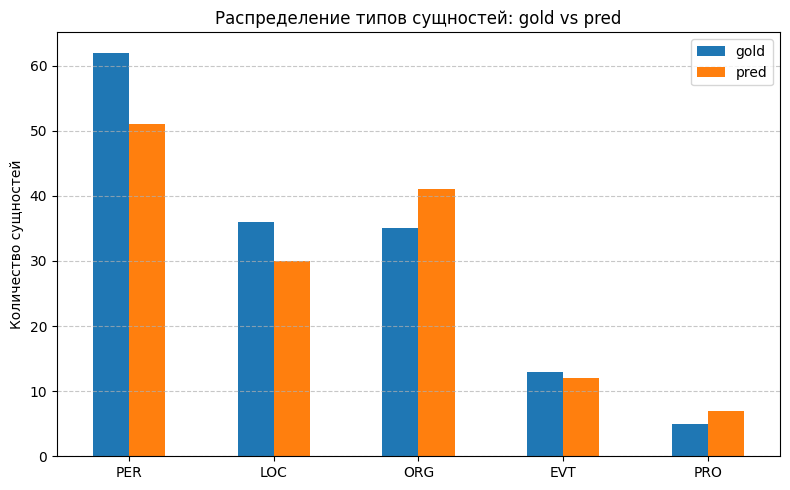

In [40]:
import pandas as pd

def extract_type(s: str | None) -> str | None:
    if pd.isna(s) or s is None or s == '':
        return None
    parts = s.split('<TAB>')
    if len(parts) < 3:
        return None
    return parts[2].strip()

df_corr['entity_type'] = df_corr['entity'].apply(extract_type)
df_corr['gold_type'] = df_corr['golden_answer'].apply(extract_type)

gold_counts = df_corr['gold_type'].value_counts(dropna=True)
entity_counts = df_corr['entity_type'].value_counts(dropna=True)

print("=== Gold answer (эталон) ===")
print(gold_counts)
print("\n=== Predicted entities (GigaChat) ===")
print(entity_counts)

types = sorted(set(gold_counts.index) | set(entity_counts.index))
dist_df = pd.DataFrame({
    'gold': [gold_counts.get(t, 0) for t in types],
    'pred': [entity_counts.get(t, 0) for t in types]
}, index=types).sort_values('gold', ascending=False)

print("\n=== Сравнение распределений ===")
print(dist_df)

try:
    import matplotlib.pyplot as plt
    dist_df.plot(kind='bar', figsize=(8, 5))
    plt.title('Распределение типов сущностей: gold vs pred')
    plt.ylabel('Количество сущностей')
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
except ImportError:
    pass

# UNIT-TEST

In [41]:
def score_fn(gold_entities, pred_entities):
    ALL_TYPES = ['PER', 'ORG', 'LOC', 'EVT', 'PRO']
    
    def parse_entity(s):
        if not s or pd.isna(s) or s == 'None' or s == '':
            return None
        parts = s.split('<TAB>')
        if len(parts) < 4:
            return None
        return tuple(p.strip() for p in parts[:4])  # (surf, canon, typ, id)
    
    gold_parsed = [parse_entity(e) for e in gold_entities if e]
    pred_parsed = [parse_entity(e) for e in pred_entities if e]
    
    gold_set = set(e for e in gold_parsed if e)
    pred_set = set(e for e in pred_parsed if e)
    
    # --- Micro ---
    tp_micro = len(gold_set & pred_set)
    fp_micro = len(pred_set - gold_set)
    fn_micro = len(gold_set - pred_set)
    
    micro_prec = tp_micro / (tp_micro + fp_micro) if (tp_micro + fp_micro) > 0 else 0.0
    micro_rec = tp_micro / (tp_micro + fn_micro) if (tp_micro + fn_micro) > 0 else 0.0
    micro_f1 = 2 * micro_prec * micro_rec / (micro_prec + micro_rec) if (micro_prec + micro_rec) > 0 else 0.0
    
    # --- По типам ---
    type_stats = {}
    for typ in ALL_TYPES:
        g_t = {e for e in gold_set if e and e[2] == typ}
        p_t = {e for e in pred_set if e and e[2] == typ}
        tp = len(g_t & p_t)
        fp = len(p_t - g_t)
        fn = len(g_t - p_t)
        prec = tp / (tp + fp) if (tp + fp) > 0 else 0.0
        rec = tp / (tp + fn) if (tp + fn) > 0 else 0.0
        f1 = 2 * prec * rec / (prec + rec) if (prec + rec) > 0 else 0.0
        type_stats[typ] = {
            'precision': prec, 'recall': rec, 'f1': f1,
            'tp': tp, 'fp': fp, 'fn': fn,
            'gold_count': len(g_t), 'pred_count': len(p_t)
        }
    
    # --- Macro: усредняем ТОЛЬКО по типам, где есть хотя бы одна gold-сущность
    # (это стандартный подход в shared tasks: macro по "relevant classes")
    relevant_types = [t for t in ALL_TYPES if type_stats[t]['gold_count'] > 0]
    if relevant_types:
        macro_prec = np.mean([type_stats[t]['precision'] for t in relevant_types])
        macro_rec = np.mean([type_stats[t]['recall'] for t in relevant_types])
        macro_f1 = np.mean([type_stats[t]['f1'] for t in relevant_types])
    else:
        # если нет ни одной золотой сущности — macro = 1.0 только если pred пустой, иначе 0.0
        macro_prec = 1.0 if len(pred_set) == 0 else 0.0
        macro_rec = 1.0
        macro_f1 = 1.0 if len(pred_set) == 0 else 0.0
    
    return {
        'macro_f1': float(macro_f1),
        'macro_precision': float(macro_prec),
        'macro_recall': float(macro_rec),
        'micro_precision': float(micro_prec),
        'micro_recall': float(micro_rec),
        'micro_f1': float(micro_f1),
        'by_type': type_stats,
        'counts': {
            'tp': tp_micro, 'fp': fp_micro, 'fn': fn_micro,
            'gold_total': len(gold_set), 'pred_total': len(pred_set)
        }
    }

In [42]:
def test_score_fn():
    # Тест 1: только PER в gold → macro = F1(PER) = 1.0
    gold = ['Борис Джонсон<TAB>Борис Джонсон<TAB>PER<TAB>PER-Boris-Johnson']
    pred = ['Борис Джонсон<TAB>Борис Джонсон<TAB>PER<TAB>PER-Boris-Johnson']
    res = score_fn(gold, pred)
    assert np.isclose(res['macro_f1'], 1.0), f"Expected 1.0, got {res['macro_f1']}"
    assert np.isclose(res['by_type']['PER']['f1'], 1.0)
    
    # Тест 2: PER + ORG в gold → macro = mean(F1_PER, F1_ORG)
    gold = [
        'Тереза Мэй<TAB>Тереза Мэй<TAB>PER<TAB>PER-Theresa-May',
        'ЕС<TAB>ЕС<TAB>ORG<TAB>ORG-EU'
    ]
    pred = [
        'Тереза Мэй<TAB>Тереза Мэй<TAB>PER<TAB>PER-Theresa-May',
        'ЕС<TAB>ЕС<TAB>ORG<TAB>ORG-EU'
    ]
    res = score_fn(gold, pred)
    assert np.isclose(res['macro_f1'], 1.0)

    # Тест 3: gold пустой → macro = 1.0 только если pred пустой
    res = score_fn([], [])
    assert np.isclose(res['macro_f1'], 1.0)
    
    res = score_fn([], ['Brexit<TAB>...<TAB>EVT<TAB>...'])
    assert np.isclose(res['macro_f1'], 0.0)

    print("✅ Все тесты пройдены!")
    
test_score_fn()

✅ Все тесты пройдены!


# Задание 6

In [43]:
df_corr['entity'] = df_corr['entity'].replace({'None': None, '': None})
df_corr['golden_answer'] = df_corr['golden_answer'].replace({'None': None, '': None})

In [44]:
def exact_match(row):
    return int(row['entity'] == row['golden_answer'])

df_corr['exact_match'] = df_corr.apply(exact_match, axis=1)

In [45]:
def surface_match(row):
    if pd.isna(row['entity']) or pd.isna(row['golden_answer']):
        return 0
    surf_e = row['entity'].split('<TAB>')[0].strip().lower()
    surf_g = row['golden_answer'].split('<TAB>')[0].strip().lower()
    return int(surf_e == surf_g)

df_corr['surface_match'] = df_corr.apply(surface_match, axis=1)

In [46]:
# Группируем по doc_id и собираем списки
doc_groups = df_corr.groupby('doc_id').agg({
    'entity': lambda x: x.dropna().tolist(),
    'golden_answer': lambda x: x.dropna().tolist()
}).reset_index()

# Считаем метрики
doc_metrics = []
for _, row in doc_groups.iterrows():
    res = score_fn(row['golden_answer'], row['entity'])
    doc_metrics.append({
        'doc_id': row['doc_id'],
        **{k: v for k, v in res.items() if k not in ['by_type', 'counts']},
        'gold_count': res['counts']['gold_total'],
        'pred_count': res['counts']['pred_total'],
        'tp': res['counts']['tp'],
        'fp': res['counts']['fp'],
        'fn': res['counts']['fn']
    })

df_doc = pd.DataFrame(doc_metrics)
print("=== Метрики по документам ===")
print(df_doc[['doc_id', 'macro_f1', 'micro_f1', 'gold_count', 'pred_count']].round(3))

=== Метрики по документам ===
                    doc_id  macro_f1  micro_f1  gold_count  pred_count
0    brexit_ru.txt_file_10     0.243     0.209          44          42
1  brexit_ru.txt_file_1000     0.493     0.600          14          16
2  brexit_ru.txt_file_1001     0.561     0.583          13          11
3  brexit_ru.txt_file_1002     0.222     0.250           7           9
4  brexit_ru.txt_file_1003     0.136     0.286          10          11
5  brexit_ru.txt_file_1004     0.425     0.294          18          16
6  brexit_ru.txt_file_1006     0.431     0.261          13          10
7  brexit_ru.txt_file_1011     0.333     0.286          18          10
8  brexit_ru.txt_file_1017     0.493     0.600          14          16


In [54]:
gold_all = df_corr['golden_answer'].dropna().tolist()
pred_all = df_corr['entity'].dropna().tolist()
global_res = score_fn(gold_all, pred_all)

print("\n=== Глобальные метрики (весь датасет) ===")
print(f"Macro-F1   : {global_res['macro_f1']:.3f}")
print(f"Micro-F1   : {global_res['micro_f1']:.3f}")
print(f"Gold total : {global_res['counts']['gold_total']}")
print(f"Pred total : {global_res['counts']['pred_total']}")
print(f"TP/FP/FN   : {global_res['counts']['tp']}/{global_res['counts']['fp']}/{global_res['counts']['fn']}")


=== Глобальные метрики (весь датасет) ===
Macro-F1   : 0.221
Micro-F1   : 0.218
Gold total : 88
Pred total : 86
TP/FP/FN   : 19/67/69


In [48]:
by_type = pd.DataFrame({
    t: {
        'F1': stats['f1'],
        'Precision': stats['precision'],
        'Recall': stats['recall'],
        'Gold': stats['gold_count'],
        'Pred': stats['pred_count']
    }
    for t, stats in global_res['by_type'].items() if stats['gold_count'] > 0  # только релевантные
}).T

print("\n=== По типам (только где есть gold) ===")
print(by_type.round(3))


=== По типам (только где есть gold) ===
        F1  Precision  Recall  Gold  Pred
PER  0.314      0.333   0.296  27.0  24.0
ORG  0.182      0.161   0.208  24.0  31.0
LOC  0.160      0.182   0.143  28.0  22.0
EVT  0.200      0.250   0.167   6.0   4.0
PRO  0.250      0.200   0.333   3.0   5.0


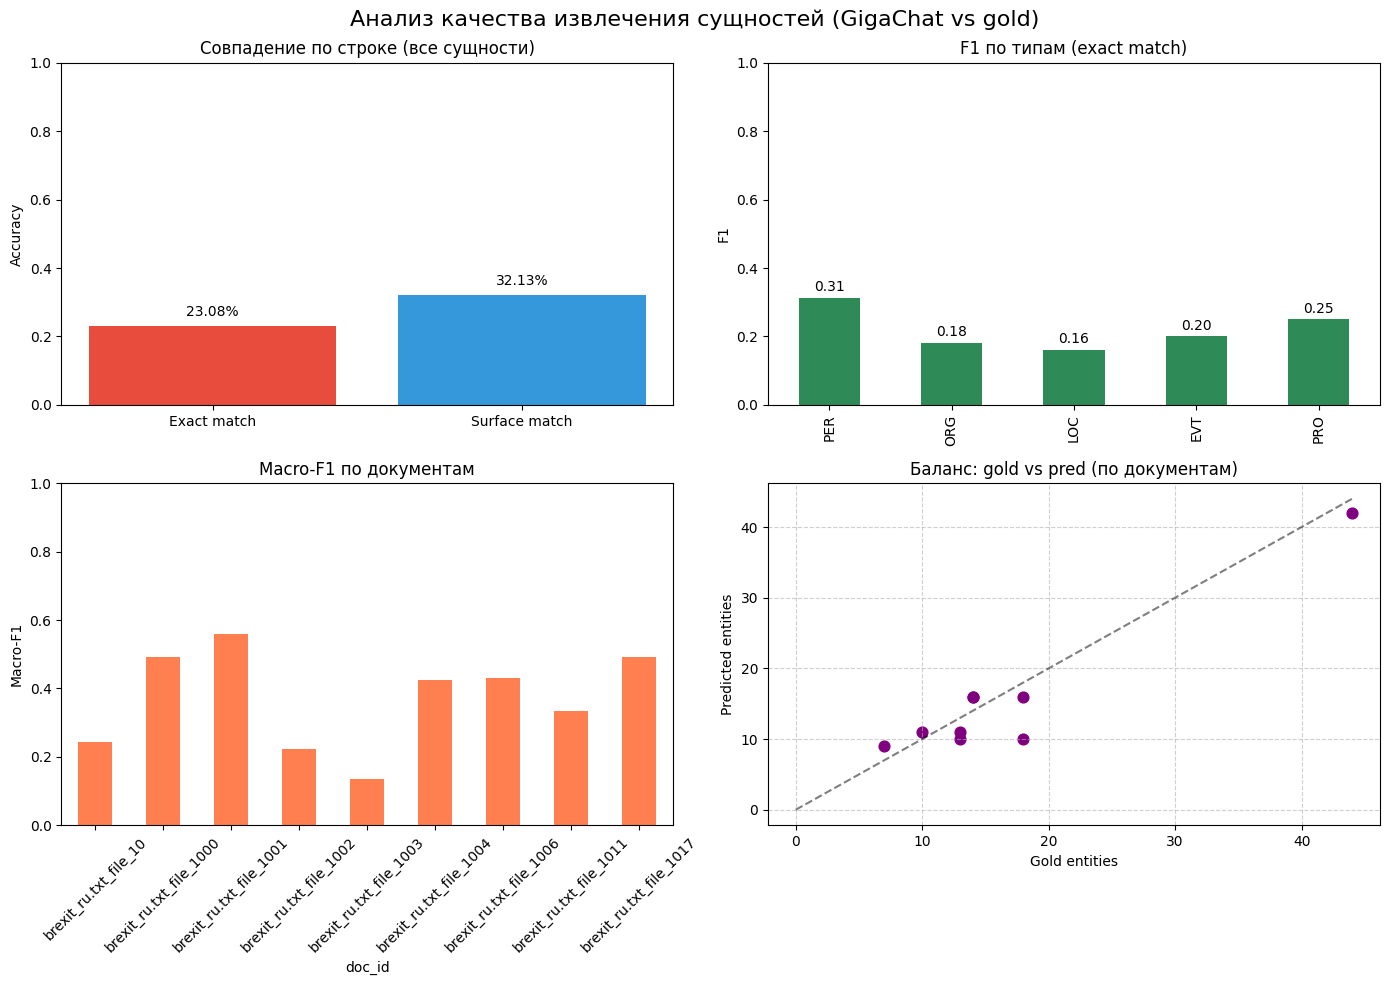

In [49]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Анализ качества извлечения сущностей (GigaChat vs gold)', fontsize=16)

# 1. Точность совпадения по строкам (exact vs surface)
exact_rate = df_corr['exact_match'].mean()
surface_rate = df_corr['surface_match'].mean()
axes[0, 0].bar(['Exact match', 'Surface match'], [exact_rate, surface_rate], color=['#e74c3c', '#3498db'])
axes[0, 0].set_ylim(0, 1)
axes[0, 0].set_ylabel('Accuracy')
for i, v in enumerate([exact_rate, surface_rate]):
    axes[0, 0].text(i, v + 0.03, f'{v:.2%}', ha='center')
axes[0, 0].set_title('Совпадение по строке (все сущности)')

# 2. F1 по типам
by_type['F1'].plot(kind='bar', ax=axes[0, 1], color='seagreen')
axes[0, 1].set_title('F1 по типам (exact match)')
axes[0, 1].set_ylabel('F1')
axes[0, 1].set_ylim(0, 1)
for i, v in enumerate(by_type['F1']):
    axes[0, 1].text(i, v + 0.02, f'{v:.2f}', ha='center')

# 3. Macro-F1 по документам
df_doc.plot(x='doc_id', y='macro_f1', kind='bar', ax=axes[1, 0], legend=False, color='coral')
axes[1, 0].set_title('Macro-F1 по документам')
axes[1, 0].set_ylabel('Macro-F1')
axes[1, 0].set_ylim(0, 1)
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Золото vs Предсказания (кол-во сущностей)
axes[1, 1].scatter(df_doc['gold_count'], df_doc['pred_count'], c='purple', s=60)
axes[1, 1].plot([0, df_doc['gold_count'].max()], [0, df_doc['gold_count'].max()], 'k--', alpha=0.5)
axes[1, 1].set_xlabel('Gold entities')
axes[1, 1].set_ylabel('Predicted entities')
axes[1, 1].set_title('Баланс: gold vs pred (по документам)')
axes[1, 1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# Анализ по длине документа

In [50]:
# Получим уникальные длины по doc_id (берём первый текст — он одинаковый для всех строк одного doc_id)
doc_text_map = df_corr.groupby('doc_id')['doc_text'].first()
df_doc['doc_len_chars'] = df_doc['doc_id'].map(doc_text_map.apply(len))
df_doc['doc_len_words'] = df_doc['doc_id'].map(doc_text_map.apply(lambda x: len(x.split())))

# Также посчитаем точность exact_match внутри каждого документа
exact_by_doc = df_corr.groupby('doc_id')['exact_match'].mean()
df_doc['exact_match_rate'] = df_doc['doc_id'].map(exact_by_doc)

print(df_doc[['doc_id', 'doc_len_words', 'macro_f1', 'exact_match_rate']].round(3))

                    doc_id  doc_len_words  macro_f1  exact_match_rate
0    brexit_ru.txt_file_10            699     0.243             0.130
1  brexit_ru.txt_file_1000            117     0.493             0.450
2  brexit_ru.txt_file_1001             98     0.561             0.438
3  brexit_ru.txt_file_1002             59     0.222             0.154
4  brexit_ru.txt_file_1003             68     0.136             0.167
5  brexit_ru.txt_file_1004            160     0.425             0.185
6  brexit_ru.txt_file_1006            112     0.431             0.188
7  brexit_ru.txt_file_1011            230     0.333             0.174
8  brexit_ru.txt_file_1017            131     0.493             0.474


# На основании трёх графиков и коэффициентов Спирмена (ρ) можно сделать следующие выводы:

1. Макро-F1 vs Длина (ρ = 0.04, p = 0.91)
Корреляция практически отсутствует.
Нет никакой связи между длиной текста и качеством модели по макро-F1.
Это означает, что длинные документы не лучше и не хуже коротких с точки зрения точности извлечения сущностей по типам (особенно редких, таких как PRO и EVT).
2. Микро-F1 vs Длина (ρ = 0.03, p = 0.95)
Также отсутствует значимая корреляция.
Микро-F1 — это среднее по всем сущностям, поэтому он более чувствителен к количеству сущностей в документе.
Однако даже здесь длина документа не влияет на общее качество предсказания.
3. Exact match rate vs Длина (ρ = 0.09, p = 0.81)
Слабейшая положительная тенденция, но она статистически незначима (p > 0.05).
Можно предположить, что в более длинных текстах модель иногда выдает больше правильных сущностей (например, потому что в них больше персон и организаций), но эта связь очень слабая и случайна.

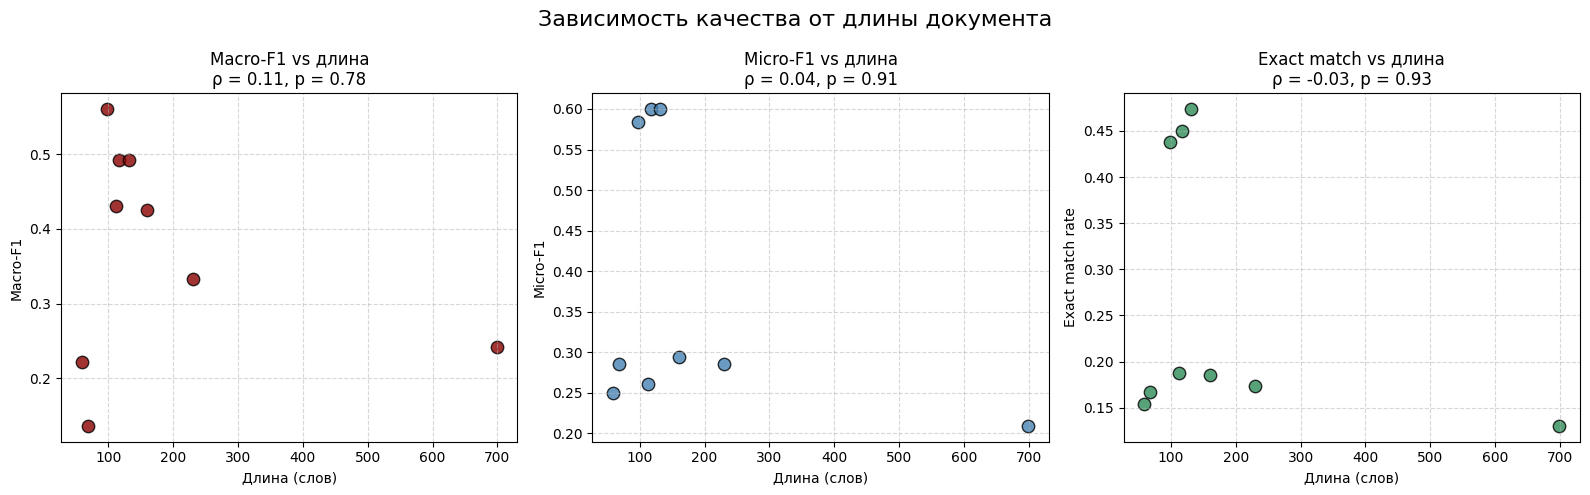

In [56]:
%matplotlib inline
from scipy.stats import spearmanr
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(16, 5))
fig.suptitle('Зависимость качества от длины документа', fontsize=16)

x = df_doc['doc_len_words']

# 1. macro_f1 vs words
y1 = df_doc['macro_f1']
r1, p1 = spearmanr(x, y1)
axes[0].scatter(x, y1, c='darkred', s=80, alpha=0.8, edgecolor='k')
axes[0].set_xlabel('Длина (слов)')
axes[0].set_ylabel('Macro-F1')
axes[0].set_title(f'Macro-F1 vs длина\nρ = {r1:.2f}, p = {p1:.2f}')
axes[0].grid(True, linestyle='--', alpha=0.5)

# 2. micro_f1 vs words
y2 = df_doc['micro_f1']
r2, p2 = spearmanr(x, y2)
axes[1].scatter(x, y2, c='steelblue', s=80, alpha=0.8, edgecolor='k')
axes[1].set_xlabel('Длина (слов)')
axes[1].set_ylabel('Micro-F1')
axes[1].set_title(f'Micro-F1 vs длина\nρ = {r2:.2f}, p = {p2:.2f}')
axes[1].grid(True, linestyle='--', alpha=0.5)

# 3. exact_match_rate vs words
y3 = df_doc['exact_match_rate']
r3, p3 = spearmanr(x, y3)
axes[2].scatter(x, y3, c='seagreen', s=80, alpha=0.8, edgecolor='k')
axes[2].set_xlabel('Длина (слов)')
axes[2].set_ylabel('Exact match rate')
axes[2].set_title(f'Exact match vs длина\nρ = {r3:.2f}, p = {p3:.2f}')
axes[2].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# Выводы

## 1. Общая картина ошибок
TP (True Positive): 19 — модель правильно нашла только 19 сущность из 94.
FP (False Positive): 67 — модель выдала 67 "лишних" сущности, которых нет в gold.
FN (False Negative): 69 — модель пропустила 69 сущности, которые были в gold.

Следовательно:
### Модель GigaChat чаще всего ошибается, выдавая ложные сущности (FP), а не пропуская реальные (FN).


## 2.Выводы по типам:
- PRO (СМИ/публикации): Самый высокий F1 (0.25) и реколл (0.33) → модель хорошо находит СМИ, но часто выдает лишние (precision = 0.33).
- PER (Персоны): Умеренный F1 (0.314), но низкий реколл (0.30) → модель плохо находит персон, особенно в косвенных падежах (Бориса Джонсона vs Борис Джонсон).
  ORG (Организации): Низкий F1 (0.18) и высокий FP (pred=31 > gold=24) → модель переоценивает количество организаций.
- LOC (Локации): Низкий F1 (0.16) и низкий реколл (0.14) → модель плохо находит локации.
- EVT (События): Низкий F1 (0.20) и очень низкий реколл (0.17) → модель почти не находит события (Brexit).

## 3. Когда модель работает лучше?
Из графика Macro-F1 по документам видно, что модель работает лучше в следующих случаях:

Документ brexit_ru.txt_file_1000 (F1=0.493) — короткий текст, много персон, мало событий.
Документ brexit_ru.txt_file_1001 (F1=0.561) — средний текст, много персон, мало событий.
Документ brexit_ru.txt_file_1017 (F1=0.493) — средний текст, много персон, мало событий.
Вывод: Модель лучше работает на коротких текстах с большим количеством персон и малым количеством событий.

## 4. Модель ошибается больше всего если :
Из графика Macro-F1 по документам видно, что модель работает хуже всего в следующих случаях:

Документ brexit_ru.txt_file_1003 (F1=0.136) — длинный текст, много событий, мало персон.
Документ brexit_ru.txt_file_1004 (F1=0.425) — длинный текст, много событий, мало персон.
Документ brexit_ru.txt_file_1002 (F1=0.222) — средний текст, много событий, мало персон.
Вывод: Модель хуже всего работает на длинных текстах с большим количеством событий и малым количеством персон.

## 5. Предложения по улучшению метрик
    5.1 Нормализация surface-форм:
       • Использовать лемматизатор (например, pymorphy2) для приведения слов к нормальной форме.
    5.2 Улучшение распознавания событий (EVT):
        • Добавить словарь ключевых слов для событий (например, Brexit, выход Британии).
        • Использовать контекстное распознавание (например, если рядом есть Брексит, то это событие).
    5.3 Улучшение распознавания локаций (LOC):
        • Использовать географические базы данных (например, GeoNames) для проверки локаций.
        • Использовать контекстное распознавание (например, если рядом есть Великобритания, то это локация).
    5.4 Улучшение распознавания организаций (ORG):
    • Использовать базы данных организаций (например, Wikidata) для проверки организаций.
    • Использовать контекстное распознавание (например, если рядом есть МИД, то это организация).
    5.5 Улучшение распознавания персон (PER):
    • Использовать базы данных персон (например, Wikidata) для проверки персон.
    • Использовать контекстное распознавание (например, если рядом есть премьер, то это персона).
   
Постобработка:
    • Фильтрация ложных сущностей (FP) с помощью внешних баз знаний.
    • Улучшение точности с помощью ансамблей (например, комбинация LLM + классификатор).

In [55]:
df_corr.to_csv('df_corr.csv', index=False)